# "No For-Loops"

In [162]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## (A). Numpy Indexing

Suppose that we have some data with some zero values. 

In [188]:
x = np.random.rand(20)
x[np.random.randint(0, 20, 10)] = 0
x

array([0.52765815, 0.        , 0.        , 0.39109979, 0.        ,
       0.42086489, 0.85226906, 0.        , 0.71757365, 0.95101034,
       0.        , 0.        , 0.        , 0.51527358, 0.        ,
       0.        , 0.55026174, 0.7872349 , 0.        , 0.1319096 ])

However, our experimenter wasn't very careful: zero values should actually be ignored in calculation. How can we compute the mean of only the nonzero values?

In [189]:
# Approach 1

x[x != 0].sum() 

5.8451556980070105

In [190]:
# Approach 2

x[x == 0] = np.nan
np.nansum(x)

5.845155698007009

## (B). Subsets by Groups

In [191]:
titanic = pd.read_csv("https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/titanic.csv")
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [192]:
# all 3rd class passengers
titanic['Name'][titanic['Pclass'] == 3]

0                   Mr. Owen Harris Braund
2                    Miss. Laina Heikkinen
4                  Mr. William Henry Allen
5                          Mr. James Moran
7            Master. Gosta Leonard Palsson
                      ...                 
878            Miss. Gerda Ulrika Dahlberg
880                  Mr. Henry Jr Sutehall
881    Mrs. William (Margaret Norton) Rice
884         Miss. Catherine Helen Johnston
886                     Mr. Patrick Dooley
Name: Name, Length: 487, dtype: object

In [222]:
# 1st class passengers without siblings/spouses
titanic['Name'][(titanic['Siblings/Spouses Aboard'] == 0) & (titanic['Pclass'] == 1)]

6                            Mr. Timothy J McCarthy
11                          Miss. Elizabeth Bonnell
23                      Mr. William Thompson Sloper
30                          Don. Manuel E Uruchurtu
53                    Mr. Engelhart Cornelius Ostby
                           ...                     
863             Mr. Washington Augustus II Roebling
868                         Mr. Frans Olof Carlsson
875    Mrs. Thomas Jr (Lily Alexenia Wilson) Potter
883                     Miss. Margaret Edith Graham
885                            Mr. Karl Howell Behr
Name: Name, Length: 137, dtype: object

## (C). Modifying Images

In this example, we'll take an XKCD comic and make it purple. In literature and film, this is called "being drunk with power." 

In [223]:
import matplotlib.image as mpimg 
comic = mpimg.imread('https://imgs.xkcd.com/comics/machine_learning_2x.png')
comic

array([[[0.7882353 , 0.7882353 , 0.7882353 ],
        [0.19607843, 0.19607843, 0.19607843],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.14901961, 0.14901961, 0.14901961],
        [0.7372549 , 0.7372549 , 0.7372549 ]],

       [[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [224]:
comic.shape

(877, 742, 3)

In [225]:
# RGB color system: (R, G, B)
# comic[i,j] gives the 3 RGB values for pixel in 
# row i and column j

# [0, 0, 0] means black
comic[1, 1]

array([0., 0., 0.], dtype=float32)

In [227]:
# [1, 1, 1] means white
comic[10, 20]

array([1., 1., 1.], dtype=float32)

(-0.5, 741.5, 876.5, -0.5)

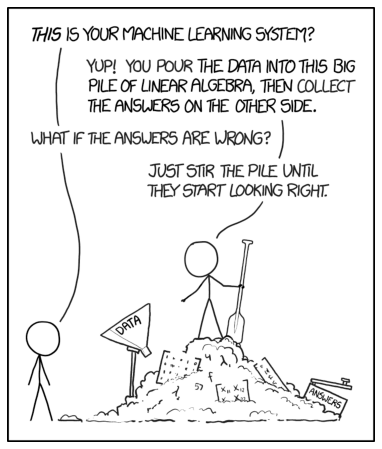

In [228]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(comic)
ax.axis("off")

In [229]:
# create a "mask" indicating which 
# pixels are shaded

mask = comic.max(axis = 2) < 0.7

In [230]:
comic[mask]

# a pleasant purple
purple = np.array([[0.4, 0.2, 0.7]])
comic[mask] = purple

(-0.5, 741.5, 876.5, -0.5)

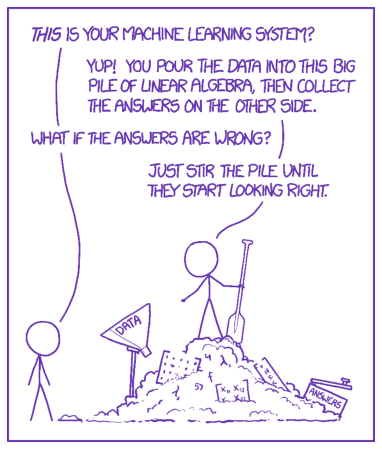

In [231]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(comic)
ax.axis("off")

In [232]:
def recolor(img, threshold, color):
    mask = (img.max(axis = 2) < threshold)
    img[mask] = color
    return img

(-0.5, 741.5, 876.5, -0.5)

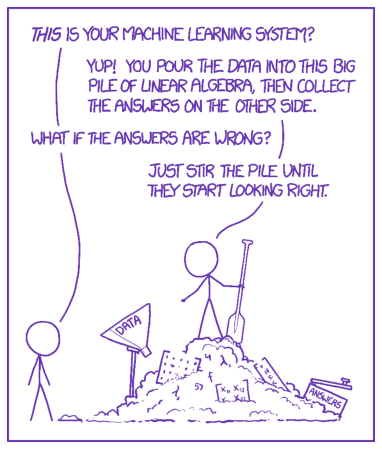

In [233]:
fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(recolor(comic, 0.7, purple))
ax.axis("off")

(-0.5, 1223.5, 801.5, -0.5)

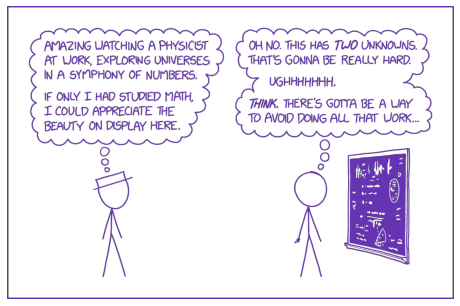

In [234]:
comic = mpimg.imread('https://imgs.xkcd.com/comics/math_work_2x.png')

fig, ax = plt.subplots(1, figsize = (8, 8))
ax.imshow(recolor(comic, 0.2, purple))
ax.axis("off")